# Business Problem
Dalam dunia perbankan, hal yang lazim jika nasabah melakukan penutupan akun atau pindah dan keluar dari Bank yang dipilihnya. Untuk mengetahui *behavior* nasabah yang melakukan churn/exit, data analis dibutuhkan untuk melihat statistik data. 

# EDA Purposes

Analisis ini dibutuhkan untuk mengurangi besarnya pengeluaran dalam bidang marketing/sales. Dengan mengetahui *behavior* nasabah yang melakukan churn, biaya operasional dapat dipangkas lebih banyak dan akan menambah profit Bank



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings ### Untuk menghilangkan notif FutureWarning di version Seaborn yang berbeda.
warnings.simplefilter(action='ignore', category=(FutureWarning,UserWarning))

In [3]:
df = pd.read_csv('bank.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [13]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

### TIDAK ADA MISSING VALUE

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Categorical and Numerical Variables

In [79]:
### Mendefine Categorical dan Numerical Variables

num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print(cat_var)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
['Surname', 'Gender', 'Geography', 'Age_group']


array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

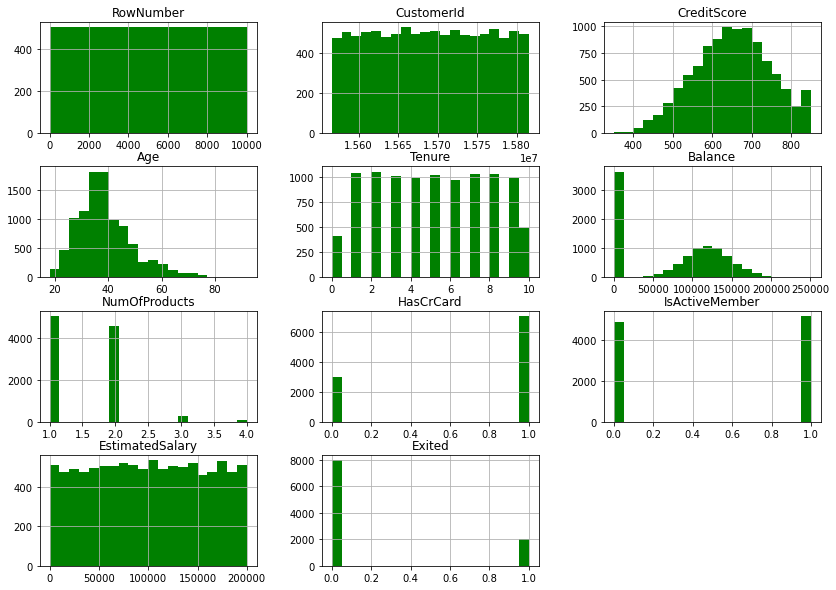

In [84]:
df[num_var].hist(bins=20,color='g',figsize=(14,10))

-Terlihat bahwa pada kolom Umur, grafik dengan right skewness

- Balance memiliki distribusi normal (dengan balance 0/ tidak memiliki tabungan)

- Credit Score cenderung memiliki left skewness

- Kolom Row number tidak terpakai

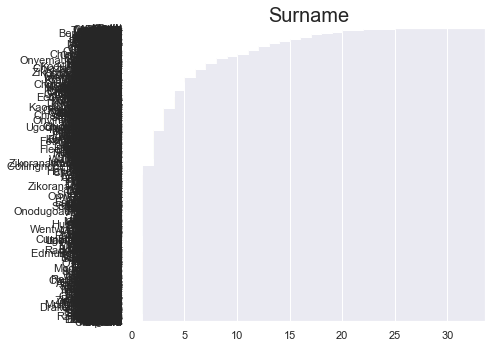

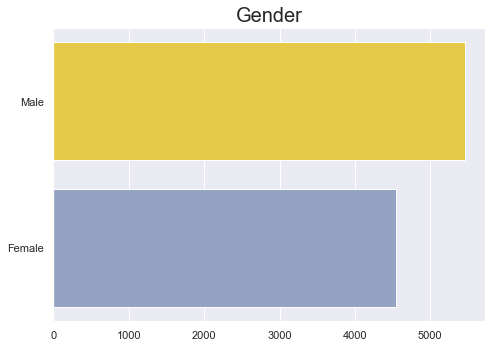

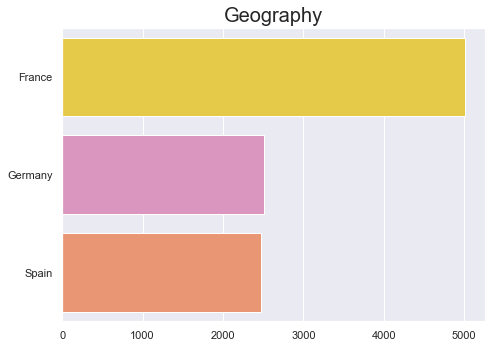

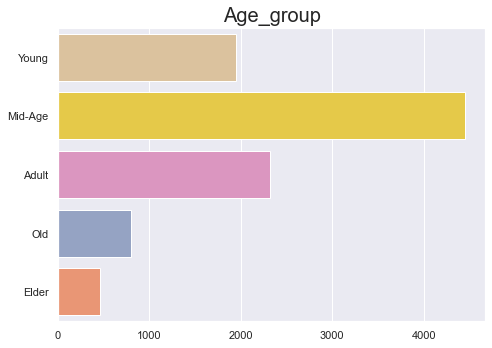

In [105]:
for col in cat_var:
    plt.figure(figsize=(7,5))
    sns.set_theme(style="darkgrid")
    sns.barplot(df[col].value_counts().values,df[col].value_counts().index,palette= 'Set2_r')
    plt.title(col,fontsize=20)
    plt.tight_layout()

dapat dilihat bahwa kolom surname dapat kita drop karena tidak dibutuhkan untuk kelanjutan analisa data.

## CORRELATION

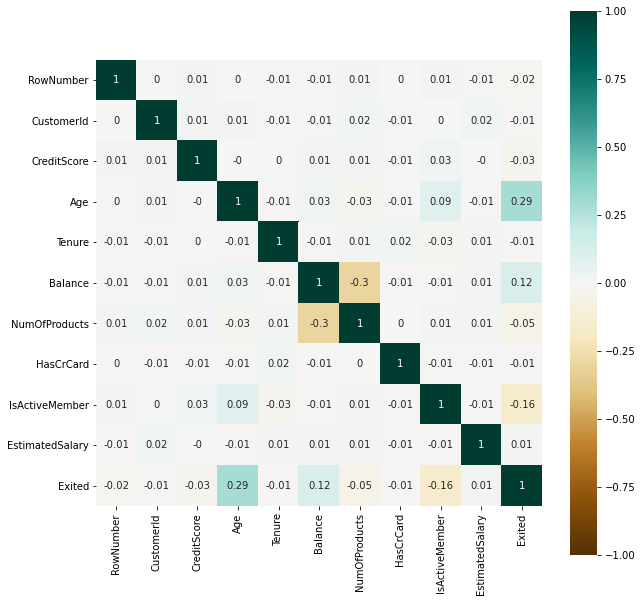

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG');

**Tidak terlihat adanya korelasi yang signifikan antar kolom.**

## EXITED / Customer Churn

0    7963
1    2037
Name: Exited, dtype: int64


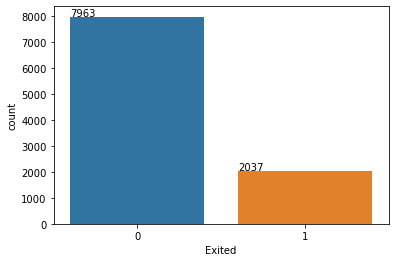

In [103]:
print(df['Exited'].value_counts()) 


a = sns.countplot('Exited',data=df)
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+25)) 



Dari data diatas, terlihat bahwa nasabah cenderung tidak pindah ke bank lain.

## Age - Exited

In [87]:
(pd.crosstab(index = df['Exited'], columns = df['Age'], normalize='columns')*100).round(2)

### m

Age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
Exited,,,,,,,,,,,,,,,,,,,,,
0,90.91,96.3,95.0,94.34,85.71,93.94,89.39,96.1,93.0,93.78,...,100.0,100.0,100.0,100.0,100.0,100.0,50.0,100.0,100.0,100.0
1,9.09,3.7,5.0,5.66,14.29,6.06,10.61,3.9,7.0,6.22,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Age', ylabel='count'>

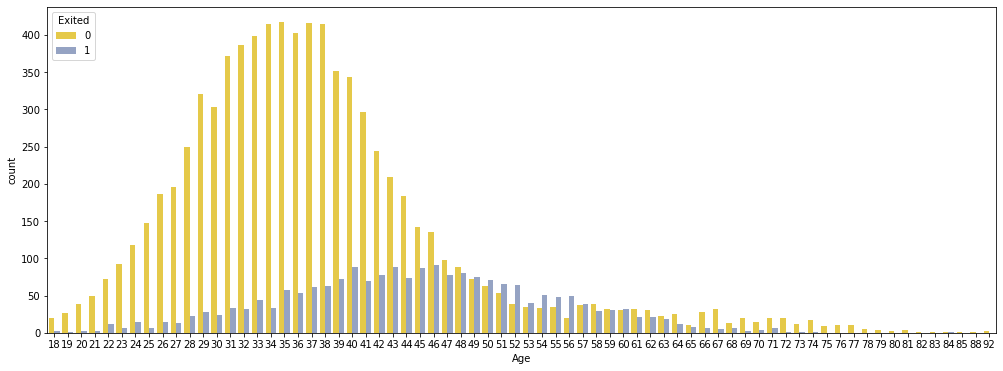

In [57]:
plt.figure(figsize = (17, 6))
sns.countplot('Age', hue = 'Exited', data = df , palette= 'Set2_r')

In [1]:
### Membagi kategori umur untuk mempermudah penarikan kesimpulan dengan fungsi pandas (pd.cut())

plt.figure(figsize=(8,5))
df["Age_group"]=pd.cut(df.Age,bins=[18,30,40,50,60,100],labels=['Young','Mid-Age','Adult',"Old",'Elder'])
a= sns.countplot(x="Age_group",data=df,hue="Exited",palette="Set2_r")
for i in a.patches:
    a.annotate((i.get_height()),(i.get_x(), i.get_height()+20)) 

NameError: name 'plt' is not defined

In [38]:
(pd.crosstab(index = df['Exited'], columns = df['Age_group'], normalize='columns')*100).round(2)

Age_group,Young,Mid-Age,Adult,Old,Elder
Exited,,,,,
0,92.46,88.24,66.03,43.79,75.22
1,7.54,11.76,33.97,56.21,24.78


### Analisa:
- Dengan menghubungkan umur dan Churn customer, terlihat bahwa kategori umur 'Old' (50-60) cenderung untuk pindah. dan kategori Mid-Age data terbanyak.

## Geography - Gender - Exited

In [39]:
(pd.crosstab(index = df['Exited'], columns = df['Geography'], normalize='columns')*100).round(2)

Geography,France,Germany,Spain
Exited,,,
0,83.85,67.56,83.33
1,16.15,32.44,16.67


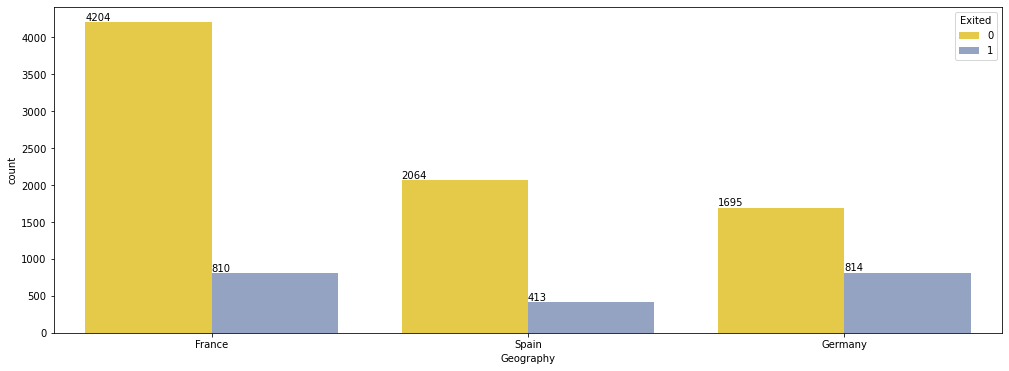

In [7]:
plt.figure(figsize = (17, 6))
a= sns.countplot('Geography', hue = 'Exited', data = df , palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+25)) 


<AxesSubplot:xlabel='Gender', ylabel='Exited'>

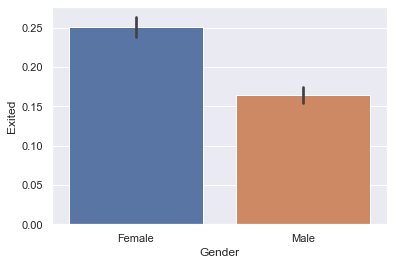

In [144]:
sns.barplot(x="Gender",y="Exited",data=df)

Male      5457
Female    4543
Name: Gender, dtype: int64


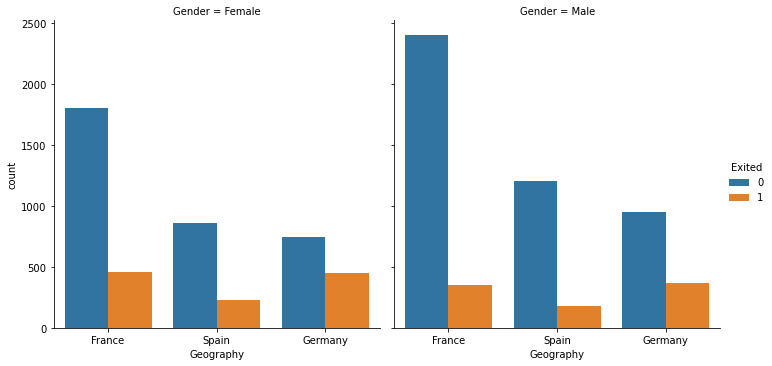

In [9]:
print(df['Gender'].value_counts()) 

sns.catplot(x="Geography", hue="Exited", col="Gender", data=df, kind="count", height=5, aspect=1)
plt.show()



#### Analisa
- berikut adalah persebaran data di tiga negara, France, Spain dan Germany.
Terlihat bahwa persebaran data mayoritas ada di negara France

- Negara Germany memiliki persentase paling tinggi untuk churn diikuti negara France dan Spain.

- Persebaran data di dominasi dengan gender Male, dengan negara France terbanyak untuk menjadi nasabah tetap.

- Analisa Perbandingan nasabah yang pindah dari perbedaan gender menunjukkan bahwa Female lebih cenderung Churn dibandingkan Male

## ActiveMember - Exited


In [156]:
(pd.crosstab(index = df['Exited'], columns = df['IsActiveMember'], normalize='index')*100).round(2)
### untuk membandingkan persentase EXITED  dari data Member Active atau tidak

IsActiveMember,0,1
Exited,,
0,44.54,55.46
1,63.92,36.08


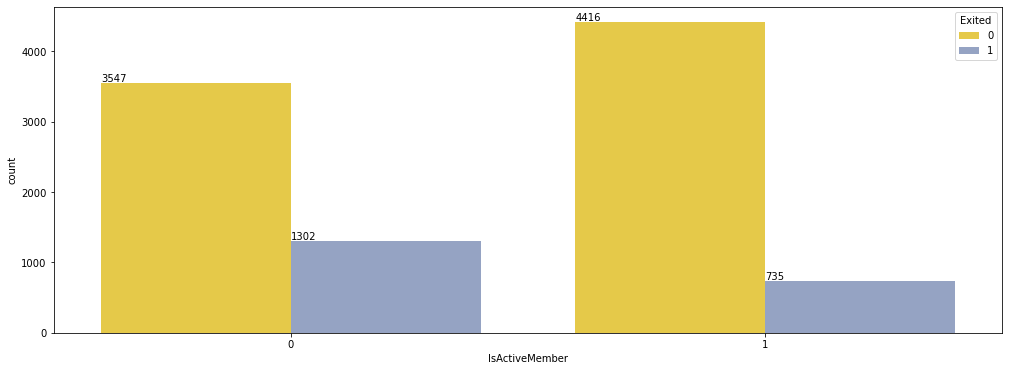

In [10]:
plt.figure(figsize = (17, 6))
a=sns.countplot('IsActiveMember', hue = 'Exited', data = df , palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+25)) 


#### Analisa : 
- Dari data sudah tidak dapat diragukan bawah yang tidak merupakan nasabah memiliki persentase untuk pindah lebih tinggi untuk churn dibandingkan nasabah tetap. 

### Balance - Exited

In [130]:
(pd.crosstab(index = df['Balance'], columns = df['Exited'], normalize='index')*100).round(2) 
### untuk membandingkan persentase perpindahan dari data Tenure

Exited,0,1
Balance,,
0.00,86.18,13.82
3768.69,0.00,100.00
12459.19,0.00,100.00
14262.80,100.00,0.00
16893.59,100.00,0.00
...,...,...
216109.88,0.00,100.00
221532.80,100.00,0.00
222267.63,0.00,100.00


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

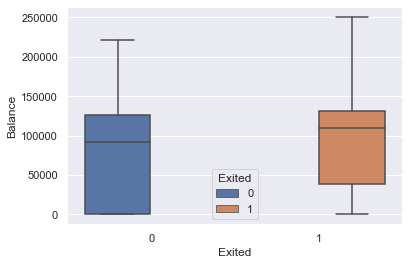

In [118]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df)

#### Analisa:
Dari data balance terhadap exited, bahwa semakin rendah tabungan seseorang kemungkinan untuk pindah juga akan semakin rendah.

### Tenure - Exited

In [127]:
(pd.crosstab(index = df['Tenure'], columns = df['Exited'], normalize='index')*100).round(2) 
### untuk membandingkan persentase perpindahan dari data Tenure

Exited,0,1
Tenure,,
0,77.00,23.00
1,77.58,22.42
2,80.82,19.18
3,78.89,21.11
4,79.47,20.53
5,79.35,20.65
6,79.73,20.27
7,82.78,17.22
8,80.78,19.22


<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

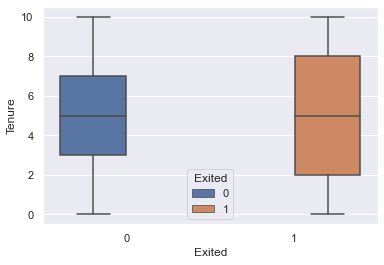

In [147]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)

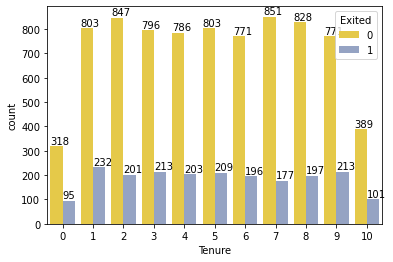

In [12]:
a= sns.countplot(x='Tenure', hue = 'Exited',data = df,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+10)) 


#### Analisa:
- Dilihat dari perbandingan Tenure dengan Exited, nasabah dengan Tenure satu bulan memiliki persentase paling tinggi untuk pindah

### Numofproducts - Exited

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

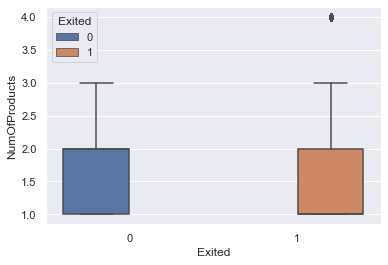

In [140]:
sns.boxplot(data = df,y='NumOfProducts',x = 'Exited', hue = 'Exited')

#### Analisa:
- Tidak menunjukkan ada yang analisa pendukung selain terdapat outliers di Numofproducts yang Exit.

### Has Credit Card - Exited

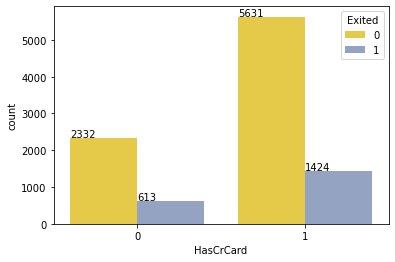

In [13]:
a= sns.countplot(x='HasCrCard', hue = 'Exited',data = df,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+25)) 


#### Analisa:
- Perbandingan persentase dari nasabah yang memiliki kartu kredit dan tidak memiliki kartu credit menunjukkan bahwa nasabah yang memiliki kartu kredit cenderung untuk churn.

# KESIMPULAN

**1. Total Nasabah mayoritas adalah Pria**

**2. Negara dengan nasabah terbanyak secara berurutan France, Germany, Spain.**

**3. Perbandingan persentase Exited (churn/non-churn) nasabah adalah 79,63% dan 20,37% (Gender Female cenderung churn)**

**4. Dari data balance terhadap exited, bahwa semakin rendah tabungan seseorang kemungkinan untuk pindah juga akan semakin rendah.**

**5. Nasabah yang memiliki kartu kredit lebih cenderung untuk Exited**

**6. Kategori umur 50-60 (Old Category) cenderung untuk Exited**

# REKOMENDASI & SARAN

**1. Secara Operasional untuk fokus terhadap nasabah dengan umur Young - MidAge yang 
lebih cenderung untuk Exit dibandingkan dengan yang sudah berumur (Old)**

**2. Fokus untuk mempertahankan nasabah yang memiliki kartu kredit**